### https://www.dataquest.io/blog/tutorial-colors-image-clustering-python/

In [1]:
import matplotlib
import PIL
import scipy

## reading image in python


In [8]:
from matplotlib import image as img

In [9]:
image = img.imread('colors.jpg')

In [11]:
image.shape

(540, 1284, 3)

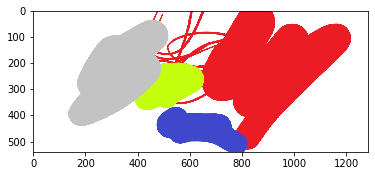

In [14]:
%matplotlib inline 
from matplotlib import pyplot as plt
plt.imshow(image)
plt.show()

In [15]:
r = []
g = []
b = []
for line in image:
    for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

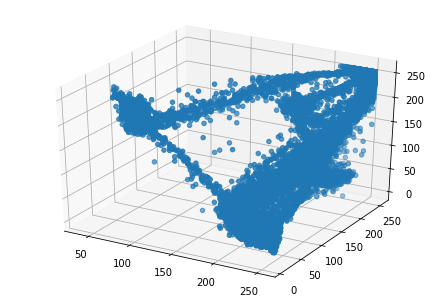

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [20]:
import pandas as pd
df = pd.DataFrame({'red': r,'blue': b, 'green': g})

In [21]:
from scipy.cluster.vq import whiten
df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])
df.sample(n = 10)

,red,blue,green,scaled_red,scaled_blue,scaled_green
666649,255,255,255,5.668195,2.651116,2.613506
195131,255,255,255,5.668195,2.651116,2.613506
322110,255,250,253,5.668195,2.599133,2.593008
211397,235,36,28,5.223631,0.374275,0.286973
654723,255,255,255,5.668195,2.651116,2.613506
376729,196,13,255,4.356730,0.135155,2.613506
108582,245,126,113,5.445913,1.309963,1.158142
259243,255,253,255,5.668195,2.630323,2.613506
380039,255,255,255,5.668195,2.651116,2.613506
374373,235,36,28,5.223631,0.374275,0.286973


In [29]:
from scipy.cluster.vq import kmeans 


In [33]:
cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 5)

In [34]:
print(cluster_centers)

[[5.66312732 2.61143041 2.64818196]
 [3.48638987 1.6303945  2.05322903]
 [4.36382526 2.60549846 0.1495929 ]
 [5.21370562 0.29513235 0.38260489]
 [5.35987554 2.20297699 2.19173844]]


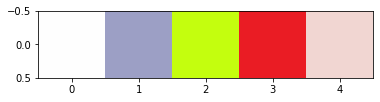

In [35]:
colors = []
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
    scaled_r * r_std / 255,
    scaled_g * g_std / 255,
    scaled_b * b_std / 255))
plt.imshow([colors])
plt.show()